In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import string
import warnings
warnings.filterwarnings("ignore")
import pickle

In [2]:
excel_data = pd.read_excel('Project_Data.xlsx')
data = pd.DataFrame(excel_data, columns=['ID','author', 'statement', 'Label'])

In [3]:
data.head(5)

ID              author                                          statement  \
0   1      Louis Jacobson  "Inflation has been caused by the global econo...   
1   2          Vivian Lam  "Study proves childrenâ€™s hearts destroyed by...   
2   3  Samantha Putterman  Photo shows the freedom convoy in Canberra, Au...   
3   4         Andy Nguyen  A molecule found in a Himalayan fungus "kills ...   
4   5       Monique Curet  Image shows "This is happening right now...in ...   

   Label  
0      0  
1      0  
2      0  
3      0  
4      0

In [4]:
data.shape

(23504, 4)

In [5]:
data_manual_testing = data.tail(504)
for i in range(23503,23000,-1):
    data.drop([i], axis = 0, inplace = True)

In [6]:
data.shape

(23001, 4)

In [7]:
data_manual_testing.to_csv("manual_testing2.csv")

In [8]:
data.columns

Index(['ID', 'author', 'statement', 'Label'], dtype='object')

In [9]:
df = data.drop(["author","ID"], axis = 1)

In [10]:
df.isnull().sum()

statement    39
Label         0
dtype: int64

In [11]:
df=df.dropna()

In [12]:
df.Label.value_counts()

0    12792
1    10170
Name: Label, dtype: int64


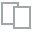
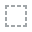
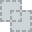
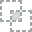
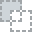
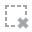
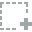
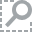
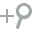
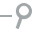
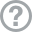
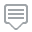
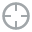
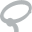
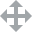
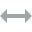
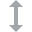
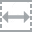
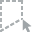
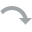
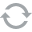
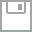
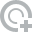
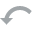
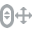
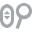
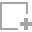
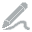
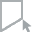
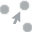
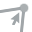
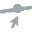

In [13]:
from dataprep.eda import plot

plot(df)

In [14]:
#Creating a function to convert the text in lowercase, remove the extra space, special chr., ulr and links.

In [15]:
df['statement'] = df['statement'].astype(str)

In [16]:
import re
import nltk  # for tokenization
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to C:\Users\Mayur
[nltk_data]     Brahmbhatt\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Mayur
[nltk_data]     Brahmbhatt\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [17]:
from nltk.corpus import stopwords # stop words
stop_words = stopwords.words('english')

In [18]:
from nltk.stem import WordNetLemmatizer # Lemmitization
lemmatizer = WordNetLemmatizer()

In [19]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [20]:
df["statement"] = df["statement"].apply(wordopt)

In [21]:
df["statement"] 

0         inflation has been caused by the global econo...
1         study proves childrenâ  s hearts destroyed by...
2        photo shows the freedom convoy in canberra  au...
3        a molecule found in a himalayan fungus  kills ...
4        image shows  this is happening right now   in ...
                               ...                        
22996    freitag    november  ãœbrige wrestler ã¼berleg...
22997    documentaries   al gore made nearly   million ...
22998    the corporate owner of sears and kmart said on...
22999    president donald trumpâ  s budget proposal for...
23000    the usa era       in retrospect it worked for ...
Name: statement, Length: 22962, dtype: object

In [22]:
df["statement"] = df["statement"].apply(nltk.word_tokenize)

In [23]:
df["statement"]

0        [inflation, has, been, caused, by, the, global...
1        [study, proves, childrenâ, s, hearts, destroye...
2        [photo, shows, the, freedom, convoy, in, canbe...
3        [a, molecule, found, in, a, himalayan, fungus,...
4        [image, shows, this, is, happening, right, now...
                               ...                        
22996    [freitag, november, ãœbrige, wrestler, ã¼berle...
22997    [documentaries, al, gore, made, nearly, millio...
22998    [the, corporate, owner, of, sears, and, kmart,...
22999    [president, donald, trumpâ, s, budget, proposa...
23000    [the, usa, era, in, retrospect, it, worked, fo...
Name: statement, Length: 22962, dtype: object

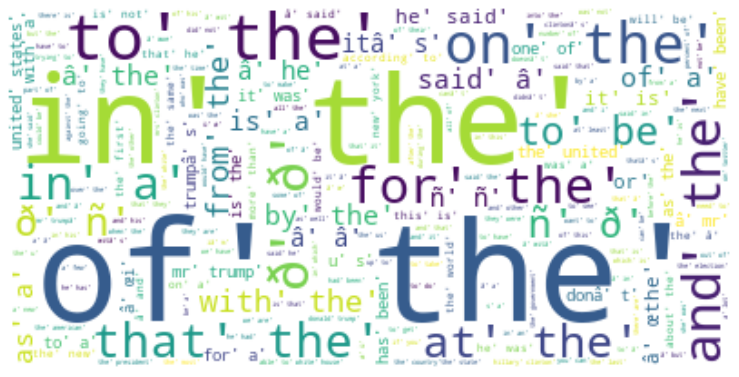

In [24]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from nltk.corpus import stopwords


t1=df['statement']

STOPWORDS = set(stopwords.words('english'))
stopwords = set(STOPWORDS)

text = " ".join(statement for statement in t1.astype(str))

wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

plt.figure(figsize=(13,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [25]:
df['statement'] = df['statement'].apply(lambda x: [item for item in x if item not in stop_words])

In [26]:
df['statement']

0        [inflation, caused, global, economies, shuttin...
1        [study, proves, childrenâ, hearts, destroyed, ...
2        [photo, shows, freedom, convoy, canberra, aust...
3        [molecule, found, himalayan, fungus, kills, ca...
4        [image, shows, happening, right, australia, mi...
                               ...                        
22996    [freitag, november, ãœbrige, wrestler, ã¼berle...
22997    [documentaries, al, gore, made, nearly, millio...
22998    [corporate, owner, sears, kmart, said, tuesday...
22999    [president, donald, trumpâ, budget, proposal, ...
23000    [usa, era, retrospect, worked, winners, losers...
Name: statement, Length: 22962, dtype: object

In [27]:
lemmatizer = WordNetLemmatizer()
df['clean_statement'] = df['statement'].apply(lambda lst:[lemmatizer.lemmatize(word) for word in lst])

In [28]:
df['clean_statement']

0        [inflation, caused, global, economy, shutting,...
1        [study, prof, childrenâ, heart, destroyed, cov...
2        [photo, show, freedom, convoy, canberra, austr...
3        [molecule, found, himalayan, fungus, kill, can...
4        [image, show, happening, right, australia, mil...
                               ...                        
22996    [freitag, november, ãœbrige, wrestler, ã¼berle...
22997    [documentary, al, gore, made, nearly, million,...
22998    [corporate, owner, sears, kmart, said, tuesday...
22999    [president, donald, trumpâ, budget, proposal, ...
23000    [usa, era, retrospect, worked, winner, loser, ...
Name: clean_statement, Length: 22962, dtype: object

In [29]:
df['clean_statement'] = df['clean_statement'].astype(str)
df

statement  Label  \
0      [inflation, caused, global, economies, shuttin...      0   
1      [study, proves, childrenâ, hearts, destroyed, ...      0   
2      [photo, shows, freedom, convoy, canberra, aust...      0   
3      [molecule, found, himalayan, fungus, kills, ca...      0   
4      [image, shows, happening, right, australia, mi...      0   
...                                                  ...    ...   
22996  [freitag, november, ãœbrige, wrestler, ã¼berle...      0   
22997  [documentaries, al, gore, made, nearly, millio...      0   
22998  [corporate, owner, sears, kmart, said, tuesday...      1   
22999  [president, donald, trumpâ, budget, proposal, ...      1   
23000  [usa, era, retrospect, worked, winners, losers...      0   

                                         clean_statement  
0      ['inflation', 'caused', 'global', 'economy', '...  
1      ['study', 'prof', 'childrenâ', 'heart', 'destr...  
2      ['photo', 'show', 'freedom', 'convoy', 'canber...  
3      ['molecule', 'found', 'himalayan', 'fungus', '...  
4      ['image', 'show', 'happening', 'right', 'austr...  
...                                                  ...  
22996  ['freitag', 'november', 'ãœbrige', 'wrestler',...  
22997  ['documentary', 'al', 'gore', 'made', 'nearly'...  
22998  ['corporate', 'owner', 'sears', 'kmart', 'said...  
22999  ['president', 'donald', 'trumpâ', 'budget', 'p...  
23000  ['usa', 'era', 'retrospect', 'worked', 'winner...  

[22962 rows x 3 columns]

In [30]:
x = df["clean_statement"]
y = df["Label"]

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [32]:
#convert text to vector

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [35]:
#logistic regression

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [38]:
pred_lr=LR.predict(xv_test)

In [39]:
LR.score(xv_test, y_test)

0.9381640829123846

In [40]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      3166
           1       0.95      0.91      0.93      2575

    accuracy                           0.94      5741
   macro avg       0.94      0.94      0.94      5741
weighted avg       0.94      0.94      0.94      5741



In [41]:
#decison tree

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [44]:
pred_dt = DT.predict(xv_test)

In [45]:
DT.score(xv_test, y_test)

0.8871276781048598

In [46]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90      3166
           1       0.88      0.87      0.87      2575

    accuracy                           0.89      5741
   macro avg       0.89      0.89      0.89      5741
weighted avg       0.89      0.89      0.89      5741



In [47]:
# Gradient boost

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

In [49]:
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [50]:
pred_gbc = GBC.predict(xv_test)

In [51]:
GBC.score(xv_test, y_test)

0.9254485281309877

In [52]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      3166
           1       0.94      0.89      0.91      2575

    accuracy                           0.93      5741
   macro avg       0.93      0.92      0.92      5741
weighted avg       0.93      0.93      0.93      5741



In [53]:
#random forest classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [56]:
pred_rfc = RFC.predict(xv_test)

In [57]:
RFC.score(xv_test, y_test)

0.9111653022121582

In [58]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      3166
           1       0.91      0.89      0.90      2575

    accuracy                           0.91      5741
   macro avg       0.91      0.91      0.91      5741
weighted avg       0.91      0.91      0.91      5741



In [59]:
#model testing

In [60]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Reliable News"
    
def manual_testing(news):
    testing_news = {"statement":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["statement"] = new_def_test["statement"].apply(wordopt) 
    new_x_test = new_def_test["statement"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]), 
                                                                                                              output_lable(pred_DT[0]), 
                                                                                                              output_lable(pred_GBC[0]), 
                                                                                                              output_lable(pred_RFC[0])))

In [ ]:
news = str(input())
manual_testing(news)

In [ ]:
pickle.dump(GBC,open('model.pkl','wb'))
model= pickle.load(open('model.pkl','rb'))